In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 1. Load & Preview Data
Load the asthma dataset from data/, show a few rows to verify columns and basic formatting.

In [12]:
df = pd.read_csv("../data/raw/asthma_disease_data.csv")  
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


# 2. Basic validity checks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

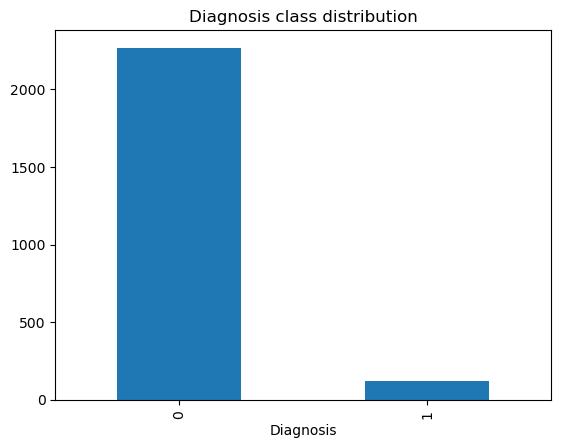

DoctorInCharge    1
dtype: int64

In [13]:
# Shape of data
df.shape

# Column info and dtypes
df.info()

# Check missing values
df.isnull().sum()

# Basic stats for numeric columns
df.describe()

# Target distribution 
df["Diagnosis"].value_counts().plot(kind="bar")
plt.title("Diagnosis class distribution")
plt.show()

# Unique values for categorical features
df.select_dtypes(include="object").nunique()


#  3.  Visualizing distributions of numeric variables using histograms

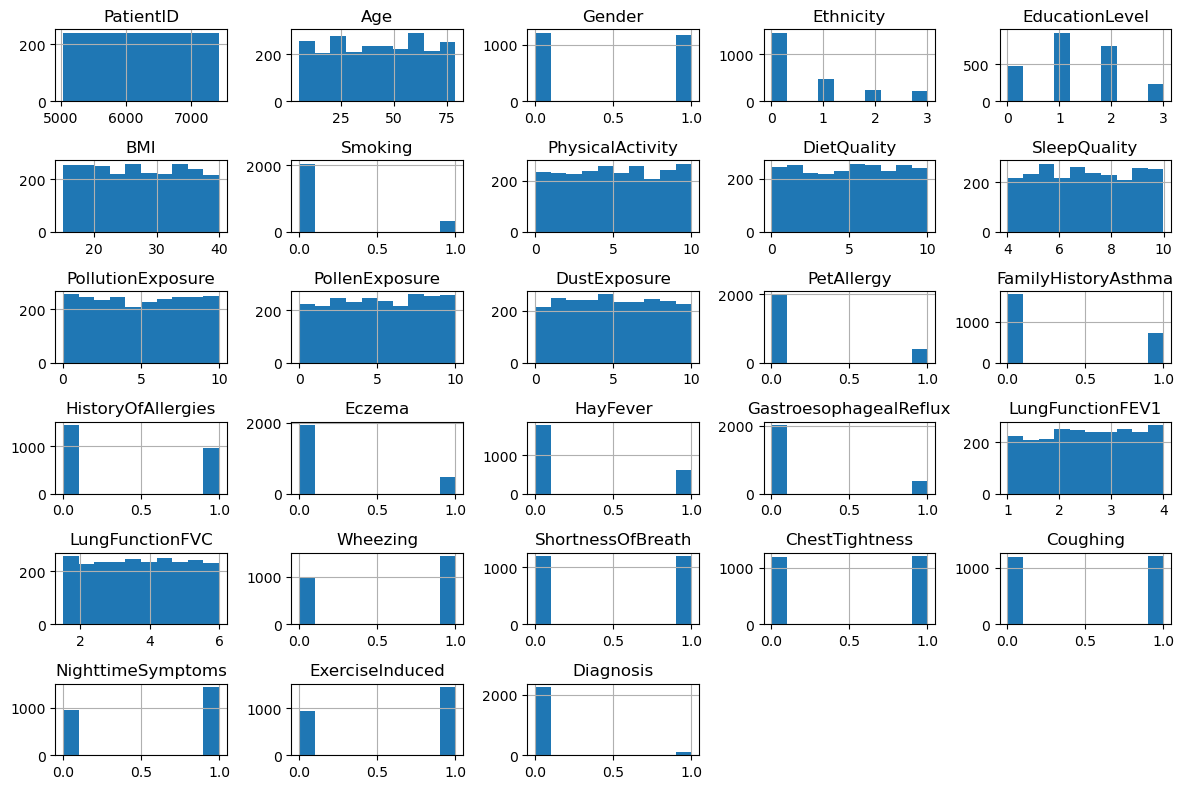

In [14]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()



# 4. Correlation with Target (Diagnosis)

Sort correlations by absolute value vs. Diagnosis and plot as a bar chart. This makes it easy to see which features are most linearly associated with the target.

⚠️ Note: PatientID showing high correlation is an identifier artifact and should not be used as a predictor; drop it later.

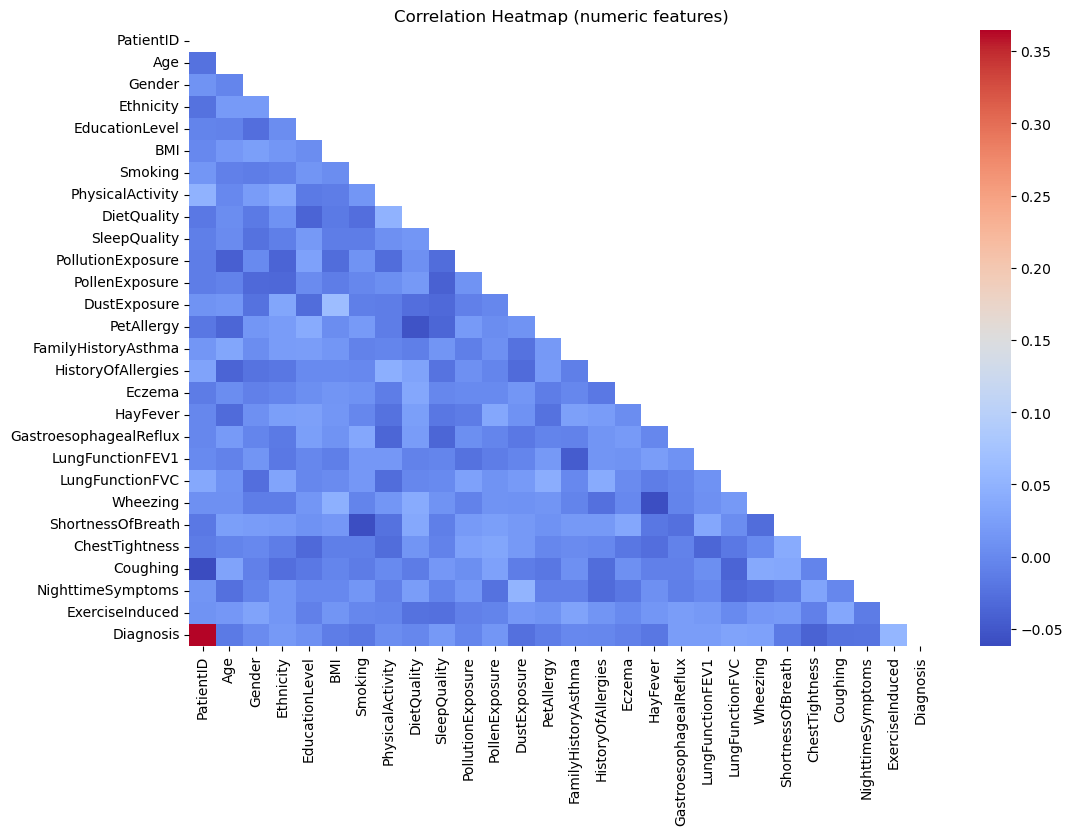

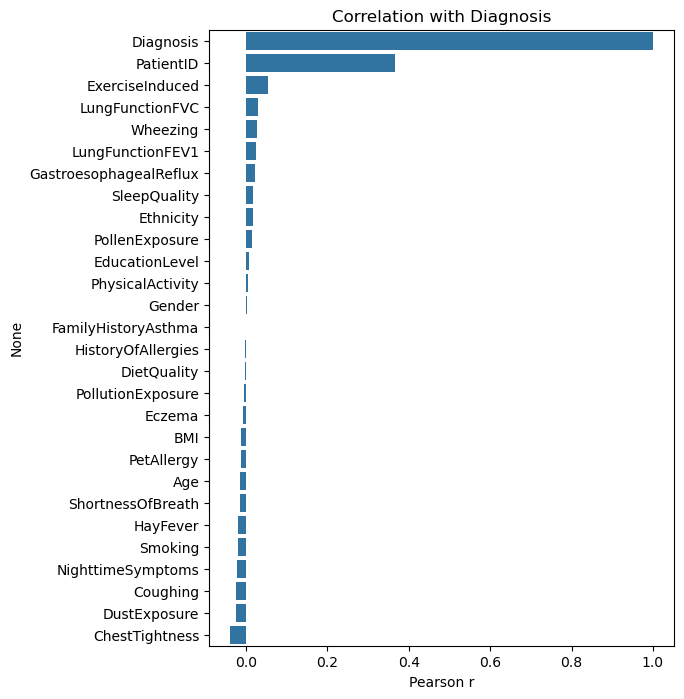

In [15]:

num_df = df.select_dtypes(include="number")   # keep numeric only
corr = num_df.corr()

# Masked heatmap (easier to read)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (numeric features)")
plt.show()

# Correlation vs target (Diagnosis)
target_corr = corr["Diagnosis"].sort_values(ascending=False)
plt.figure(figsize=(6, 8))
sns.barplot(x=target_corr, y=target_corr.index)
plt.title("Correlation with Diagnosis")
plt.xlabel("Pearson r")
plt.show()